Pare esse exercício serão disponibilizados três arquivos: ***amazonas.csv*** que contém dados históricos de desflorestamento nos municipios do Amazonas no ano de 2014, ***estados.csv*** que contém uma lista com o nome, uf e codigo dos estados brasileiros e ***municipios.csv*** que contém o nome de todos os municípios brasileiros e suas respectivas localizações no globo (longitude e latitude).

O objetivo do exercício é gerar um relatório sobre o desflorestamento nos municípios do Amazonas com a visualização dos dados sobre o mapa do Brasil.
Para isso será necessário relacionar ambas as três tabelas de forma que seja associado a posição geográfica (longitude e latitude) dos municípios aos dados de desflorestamento.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#biblioteca para plotar no mapa
import mplleaflet

In [2]:
#começaremos importando todas as tabelas
base_am = pd.read_csv('amazonas.csv', na_values = 'NaN')
base_st = pd.read_csv('estados.csv', na_values = 'NaN')
base_mu = pd.read_csv('municipios.csv', na_values = 'NaN')

Vamos da uma olhada no jeito de cada tabela

In [3]:
base_am.head()

,Municípios,Agricultura Anual,Área não Observada,Área Urbana,Desflorestamento 2014,Floresta,Hidrografia,Mineração,Mosaico de Ocupações,Não Floresta,Outros,Pasto com Solo Exposto,Pasto Limpo,Pasto Sujo,Reflorestamento,Regeneração com Pasto,Vegetação Secundária,Total Geral
0,Alvaraes,NaN,0.07,1.90,2.75,"5,415.56",133.87,NaN,101.08,43.26,5.36,NaN,2.92,1.02,NaN,5.13,198.55,"5,911.46"
1,Amatura,NaN,NaN,2.05,0.36,"4,220.22",209.41,NaN,15.87,216.55,3.76,NaN,4.03,NaN,NaN,11.44,71.74,"4,755.42"
2,Anama,NaN,0.86,0.89,0.44,"2,001.85",229.30,NaN,6.90,34.81,13.11,NaN,2.02,0.87,NaN,NaN,160.61,"2,451.66"
3,Anori,NaN,0.15,2.77,0.59,"4,646.53",436.07,NaN,17.12,636.01,4.70,NaN,8.05,0.52,NaN,NaN,41.98,"5,794.49"
4,Apui,NaN,6.71,5.91,80.19,"51,396.43",213.50,NaN,8.76,622.87,7.18,NaN,812.61,329.85,NaN,208.13,546.18,"54,238.32"


In [4]:
base_st.head()

,codigo_uf,uf,nome
0,11,RO,Rondônia
1,12,AC,Acre
2,13,AM,Amazonas
3,14,RR,Roraima
4,15,PA,Pará


In [5]:
base_mu.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15


Apos carregar os dados devemos associar as tabelas de estados e municípios e selecionar apenas os municípios do Amazonas

In [6]:
# codigo_uf Amazonas: 13

base_mu_am = base_mu[base_mu['codigo_uf'] == 13]
base_mu_am.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
170,1300029,Alvarães,-3.22727,-64.8007,0,13
195,1300060,Amaturá,-3.37455,-68.2005,0,13
216,1300086,Anamã,-3.56697,-61.3963,0,13
252,1300102,Anori,-3.74603,-61.6575,0,13
286,1300144,Apuí,-7.19409,-59.8960,0,13


Note que nos dados provenientes da tabela ***municipios.csv*** o nome dos municípios estão todos acentuados, no entanto na tabela amazonas os nomes estão sem acento. Logo é necessario remover os acentos dos nomes da tabela ***municipios.csv***.

In [7]:
from unicodedata import normalize
# use esta funçao para remover acentos
def remove_acentos_python3(txt):
    return str(normalize('NFKD', txt).encode('ASCII', 'ignore'), 'utf-8')

In [8]:
base_mu_am['nome'] = base_mu_am['nome'].apply(remove_acentos_python3)
base_mu_am.head()

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
170,1300029,Alvaraes,-3.22727,-64.8007,0,13
195,1300060,Amatura,-3.37455,-68.2005,0,13
216,1300086,Anama,-3.56697,-61.3963,0,13
252,1300102,Anori,-3.74603,-61.6575,0,13
286,1300144,Apui,-7.19409,-59.8960,0,13


Em seguida relacione as tabelas municipios e amazonas.

In [9]:
if base_am.shape[0] == np.sum(base_mu_am['nome'].values == base_am['Municípios'].values):
    print('Ordem dos municípios correta!')

Ordem dos municípios correta!


In [10]:
aux = base_mu_am.drop(['nome', 'codigo_uf'], axis = 1).reset_index(drop = True)
aux.head()
base = pd.concat([aux, base_am], axis = 1)
base = base.rename(columns = {"codigo_ibge": "Código_ibge", "latitude": "Latitude", 
                              "longitude": "Longitude", "capital": "Capital"}) 
base.sample(5)

,Código_ibge,Latitude,Longitude,Capital,Municípios,Agricultura Anual,Área não Observada,Área Urbana,Desflorestamento 2014,Floresta,...,Mosaico de Ocupações,Não Floresta,Outros,Pasto com Solo Exposto,Pasto Limpo,Pasto Sujo,Reflorestamento,Regeneração com Pasto,Vegetação Secundária,Total Geral
44,1303304,-5.125930,-60.3732,0,Novo Aripuana,NaN,26.10,5.58,22.55,"37,840.85",...,23.54,"1,614.89",42.87,NaN,296.89,62.84,NaN,50.26,425.68,"41,188.92"
42,1303106,-3.900370,-59.0940,0,Nova Olinda do Norte,NaN,0.63,4.03,1.14,"4,473.84",...,83.87,281.93,26.77,NaN,24.61,4.39,NaN,6.83,224.66,"5,607.75"
54,1304005,-2.817480,-58.2480,0,Silves,NaN,58.71,2.01,0.54,"2,588.26",...,53.68,133.09,67.18,NaN,31.00,1.04,NaN,16.53,168.40,"3,746.72"
7,1300409,-0.983373,-62.9311,0,Barcelos,NaN,0.23,4.27,1.91,"100,948.88",...,25.66,"16,837.56",5.68,NaN,1.32,0.10,NaN,4.84,146.95,"122,442.07"
16,1301001,-4.881610,-66.9086,0,Carauari,NaN,0.15,5.93,1.05,"25,084.19",...,27.54,12.81,10.37,NaN,39.81,3.90,NaN,17.94,175.89,"25,770.94"


In [11]:
base.columns

Index(['Código_ibge', 'Latitude', 'Longitude', 'Capital', 'Municípios',
       'Agricultura Anual', 'Área não Observada', 'Área Urbana',
       'Desflorestamento 2014', 'Floresta', 'Hidrografia', 'Mineração',
       'Mosaico de Ocupações', 'Não Floresta', 'Outros',
       'Pasto com Solo Exposto', 'Pasto Limpo', 'Pasto Sujo',
       'Reflorestamento', 'Regeneração com Pasto', 'Vegetação Secundária',
       'Total Geral'],
      dtype='object')

### Questão


Plote no mapa do Brasil indicadores  de desflorestamento para todos os municipios do amazonas.
Os indicadores devem ser relativos ao tamanho da floresta de cada município dando destaque aos municipios que com desflorestamento acima da média.

#### Dica

O desflorestamento relativo é dado pelas colunas ***Desflorestamento 2014*** / ***Floresta*** da tabela ***amazonas.csv***.
Note que a coluna ***Floresta*** não é numérica e contém ',' separando os milhares, sendo necessário remover a ',' de todas as entradas e logo após converter os valores para float.

Podem ser usadas todas as dicas relevantes sobre apresentação de figuras  nos textos *Making Data Meaningful* e *Ten Simple Rules for Better Figures*.

Para plotar sobre o mapa, pode-se usar a funções normais do matplotlib e ao fim chamar a função **mplleaflet.display()**.

In [12]:
def to_float(value):
    value = value.strip()
    aux = []
    for i in range(len(value)):
        if value[i] == ',' or value[i] == '.':
            continue
        else:
            aux.append(value[i])
    ans = float(''.join(aux))
    return ans

base['Floresta'] = base['Floresta'].apply(to_float)

In [13]:
#calcula as informações do desflorestamento

base['Desflorestamento relativo'] = base['Desflorestamento 2014']/base['Floresta']

In [14]:
base.head()

,Código_ibge,Latitude,Longitude,Capital,Municípios,Agricultura Anual,Área não Observada,Área Urbana,Desflorestamento 2014,Floresta,...,Não Floresta,Outros,Pasto com Solo Exposto,Pasto Limpo,Pasto Sujo,Reflorestamento,Regeneração com Pasto,Vegetação Secundária,Total Geral,Desflorestamento relativo
0,1300029,-3.22727,-64.8007,0,Alvaraes,NaN,0.07,1.90,2.75,541556.0,...,43.26,5.36,NaN,2.92,1.02,NaN,5.13,198.55,"5,911.46",5.077961e-06
1,1300060,-3.37455,-68.2005,0,Amatura,NaN,NaN,2.05,0.36,422022.0,...,216.55,3.76,NaN,4.03,NaN,NaN,11.44,71.74,"4,755.42",8.530361e-07
2,1300086,-3.56697,-61.3963,0,Anama,NaN,0.86,0.89,0.44,200185.0,...,34.81,13.11,NaN,2.02,0.87,NaN,NaN,160.61,"2,451.66",2.197967e-06
3,1300102,-3.74603,-61.6575,0,Anori,NaN,0.15,2.77,0.59,464653.0,...,636.01,4.70,NaN,8.05,0.52,NaN,NaN,41.98,"5,794.49",1.269765e-06
4,1300144,-7.19409,-59.8960,0,Apui,NaN,6.71,5.91,80.19,5139643.0,...,622.87,7.18,NaN,812.61,329.85,NaN,208.13,546.18,"54,238.32",1.560225e-05


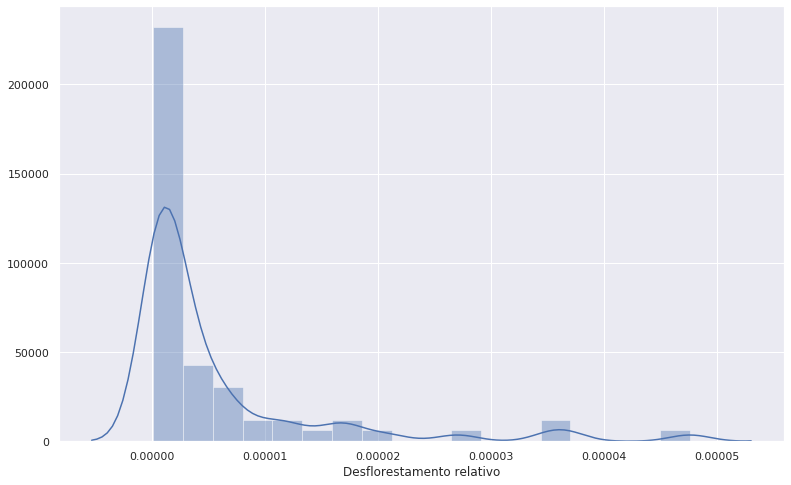

In [15]:
sns.set()
plt.figure(figsize=(13,8))
sns.distplot(base['Desflorestamento relativo'])

In [16]:
from sklearn.preprocessing import MinMaxScaler

def overMean(data, by):
    mean = np.mean(data[by].values)
    return data[data[by] > mean].index

def scatterSized(data, by, marker = '^', alpha = 0.7):
    n = data.shape[0]
    if by is not None:
        scaler = MinMaxScaler()
        X = scaler.fit_transform(data[by].values.reshape(-1,1))*2500
    idx_high = overMean(data, by)
    
    for i in range(n):
        if i in idx_high:
            plt.scatter(data['Longitude'][i], data['Latitude'][i], s = X[i], c = 'coral', alpha = alpha, marker=marker)
        else:
            plt.scatter(data['Longitude'][i], data['Latitude'][i], s = X[i], c = 'green', alpha = alpha, marker=marker)
    

In [19]:
print('Desflorestamento relativo:')
#codigo de plot
plt.figure(figsize=(8,10))

scatterSized(base, 'Desflorestamento relativo', marker = 'o')
#transforma o plot em localizações no mapa

mplleaflet.display()

Desflorestamento relativo:


/home/lucasnseq/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Questão


Segundo os dados, a mineração nos municípios tem alguma relação com o desflorestamento acima da média?
Mostre suas conclusões por tabelas e plots no mapa.

In [18]:
#calcula as relaçoes entre desflorestamento e mineração
base_over_mean = base[base['Desflorestamento relativo'] > np.mean(base['Desflorestamento relativo'])]
base_over_mean = base_over_mean[['Desflorestamento relativo', 'Mineração']].dropna().reset_index(drop = True)
base_under_mean = base[base['Desflorestamento relativo'] <= np.mean(base['Desflorestamento relativo'])]
base_under_mean = base_under_mean[['Desflorestamento relativo', 'Mineração']].dropna().reset_index(drop = True)

base_under_mean['Acima da média'] = pd.DataFrame({'Acima da média': np.zeros(base_under_mean.shape[0], dtype = int)})
base_over_mean['Acima da média'] = pd.DataFrame({'Acima da média': np.ones(base_over_mean.shape[0], dtype = int)})

base_min_des = pd.concat([base_under_mean, base_over_mean], axis = 0)
base_min_des

,Desflorestamento relativo,Mineração,Acima da média
0,1.892047e-07,0.01,0
1,8.816838e-07,0.01,0
2,2.449973e-06,16.89,0
3,3.802863e-06,6.70,0
4,2.918062e-06,1.48,0
5,2.121600e-06,0.88,0
6,3.845207e-06,0.14,0
7,5.472619e-07,1.78,0
0,3.682156e-05,1.90,1
1,1.729409e-05,0.39,1


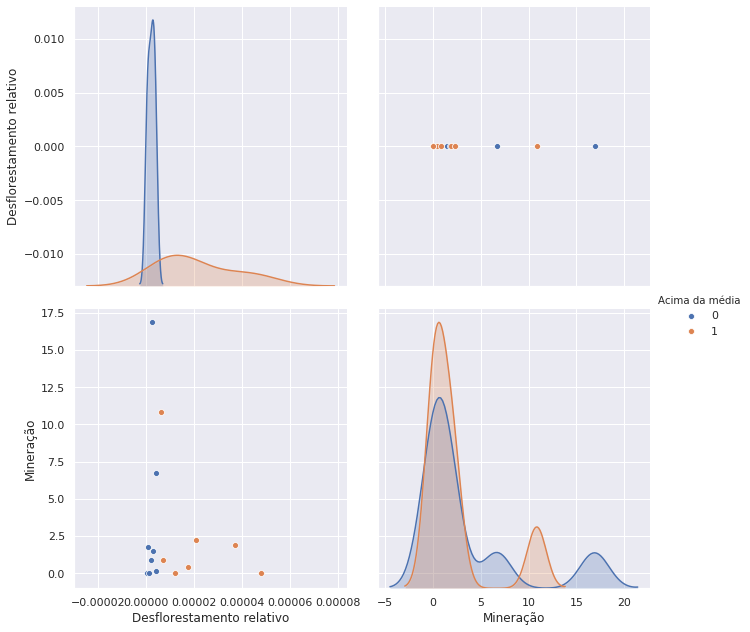

In [19]:
sns.set()
sns.pairplot(base_min_des, hue = 'Acima da média', vars = ['Desflorestamento relativo', 'Mineração'], height = 4.5)

In [20]:
under_min_sum = sum(base_min_des[base_min_des['Acima da média'] == 0]['Mineração'])
over_min_sum = sum(base_min_des[base_min_des['Acima da média'] == 1]['Mineração'])

print('Total de mineração:')
print('\t- {0:1.2f} (acima da média em desflorestamento relativo)'.format(over_min_sum))
print('\t- {0:1.2f} (abaixo da média em desflorestamento relativo)'.format(under_min_sum))

Total de mineração:
	- 16.31 (acima da média em desflorestamento relativo)
	- 27.89 (abaixo da média em desflorestamento relativo)


**Conclusoes sobre mineração e desflorestamento**

Concluímos que para aqueles municípios que possuem mineração ativa, a mineração é mais presente em municípios com menor índice de desflorestamento relativo

In [21]:
idx = base['Mineração'].dropna().index
base_min = base.loc[idx,:].reset_index(drop = True)
base_min.head()

,Código_ibge,Latitude,Longitude,Capital,Municípios,Agricultura Anual,Área não Observada,Área Urbana,Desflorestamento 2014,Floresta,...,Não Floresta,Outros,Pasto com Solo Exposto,Pasto Limpo,Pasto Sujo,Reflorestamento,Regeneração com Pasto,Vegetação Secundária,Total Geral,Desflorestamento relativo
0,1300409,-0.983373,-62.9311,0,Barcelos,NaN,0.23,4.27,1.91,10094888.0,...,"16,837.56",5.68,NaN,1.32,0.10,NaN,4.84,146.95,"122,442.07",1.892047e-07
1,1300706,-8.742320,-67.3919,0,Boca do Acre,NaN,17.96,5.49,71.96,1954290.0,...,61.64,17.49,NaN,"1,040.03",315.60,NaN,241.86,438.78,"21,946.33",3.682156e-05
2,1300839,-3.315370,-61.2206,0,Caapiranga,NaN,9.68,2.89,0.76,861987.0,...,181.34,42.79,NaN,5.42,0.25,NaN,9.71,144.23,"9,460.72",8.816838e-07
3,1301852,-3.274790,-60.1900,0,Iranduba,0.3,1.89,33.64,2.24,129524.0,...,132.02,43.20,0.07,35.40,9.29,NaN,36.15,202.81,"2,215.20",1.729409e-05
4,1301902,-3.138610,-58.4449,0,Itacoatiara,0.0,151.70,16.14,5.54,464479.0,...,861.47,182.12,0.33,245.05,23.03,NaN,54.02,689.04,"8,895.72",1.192734e-05


In [22]:
#codigo de plot
plt.figure(figsize=(8,8))

print('Mineração:')

scatterSized(base, 'Desflorestamento relativo', marker = 'o', alpha = 0.3)
scatterSized(base_min, 'Mineração', marker = '^', alpha = 0.7)

#transforma o plot em localizações no mapa
mplleaflet.display()

Mineração:


/home/lucasnseq/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
